In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

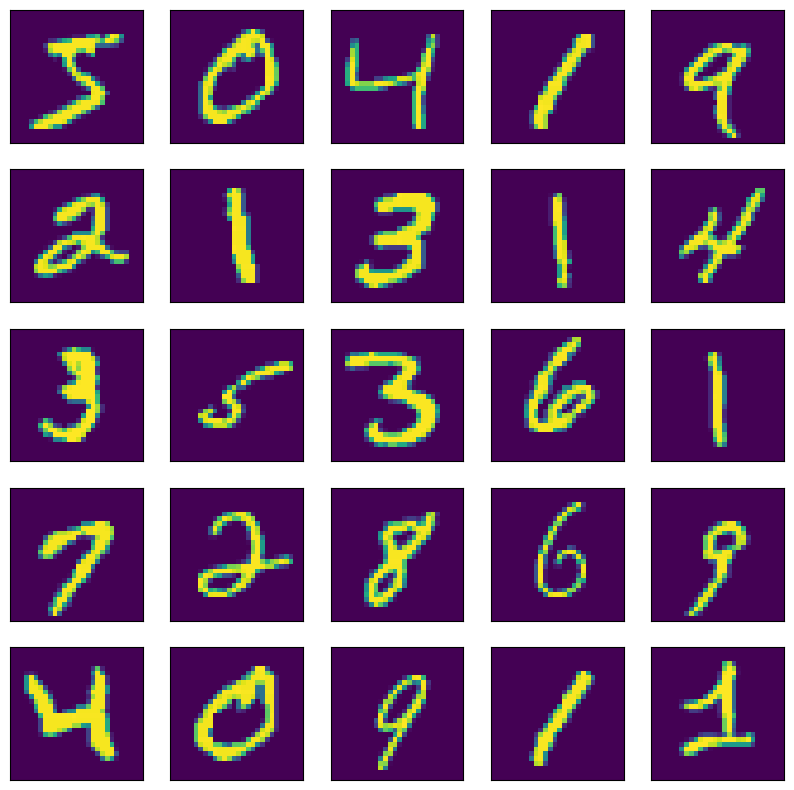

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split= 0.1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 63s 36ms/step - loss: 0.1524 - accuracy: 0.9534 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 2/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0430 - val_accuracy: 0.9868
Epoch 3/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 4/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0369 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0304 - val_accuracy: 0.9918
Epoch 6/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0349 - val_accuracy: 0.9917
Epoch 7/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0341 - val_accura

313/313 - 3s - loss: 0.0508 - accuracy: 0.9889 - 3s/epoch - 8ms/step


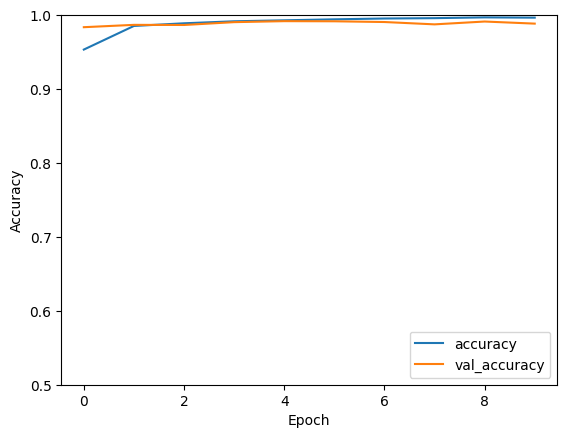

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9889000058174133


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions[0]

array([0.08533885, 0.08533886, 0.08534142, 0.08534219, 0.08533885,
       0.08533885, 0.08533885, 0.23193564, 0.08533897, 0.08534736],
      dtype=float32)

In [ ]:
test_labels[0]

7

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
predictions = model.predict(test_images[:5])
predicted_labels = tf.argmax(predictions, axis=1)
for i in range(5):
    predicted_class=class_names[predicted_labels[i]]
    actual_class=class_names[test_labels[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")

1/1 [==============================] - 0s 89ms/step
Predicted: seven, Actual: seven
Predicted: two, Actual: two
Predicted: one, Actual: one
Predicted: zero, Actual: zero
Predicted: four, Actual: four


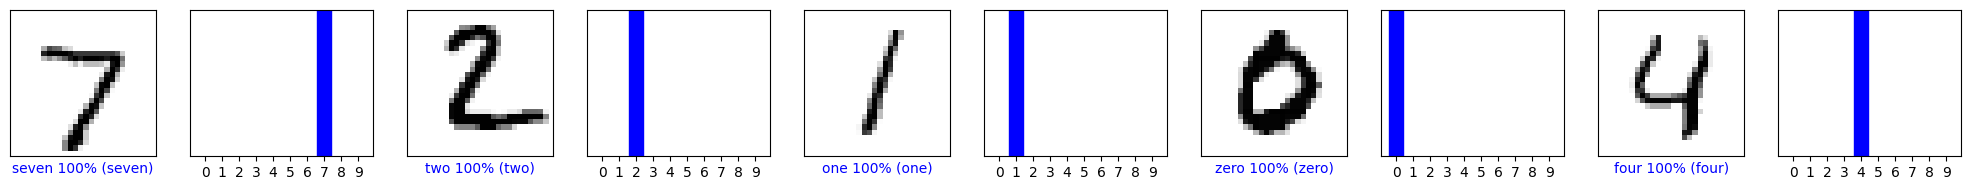

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 1
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

ganamos